In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
from HyperParameterTuning import *


# from MakeSTFTs import *
# from Train import *
# from AudioUtils import *

# Load a demo sample, convert to STFT and back and play the sound.
#demo_stft("Samples/Piano C4 Major 13.wav", 2048, 2048*3//4)

Using device=mps
middle-C=261.63 Hz
Using sample rate=44100 Hz, FFT=2048 buckets, hop=1536 samples, duration=2.0 sec = 57 time steps


In [3]:
# Read all available samples and convert to STFTs
#make_STFTs()

Loaded 1017 STFTs from STFTs.pkl
Most average: Kawai-K11-Dulcimer-C4.wav
Furthest: Electric Guitar - Drive C3.wav
Furthest: Roland-U-220-Unconvincing-Guitar-C4.wav
Furthest: Sine C3.wav
Furthest: Electric Guitar - Drive C4.wav
Furthest: Alesis-S4-Plus-Charang-C4.wav
Furthest: Fujara C3.wav
Furthest: Electric Guitar - Clean C3.wav
Furthest: Ensoniq-SQ-1-Trombone-C4.wav
Furthest: Alesis-Sanctuary-QCard-St-Pauls-C3.wav
Furthest: Casio-MT-600-Strings-1-C4.wav
Furthest: Casio-CZ-5000-Violin-C4.wav
Furthest: Ensoniq-SQ-1-Trumpet-C3.wav
Furthest: Bass Riser C3.wav
Furthest: Overtone Flute C4.wav
Furthest: Overtone Flute C3.wav
Furthest: Fujara C4.wav
Furthest: E-Piano C3.wav
Furthest: Reese or Rise C3.wav
Furthest: Fault C3.wav
Furthest: Hang Drum C4.wav
Furthest: Alesis-Sanctuary-QCard-Sanctuary-C3.wav
Furthest: Ensoniq-ZR-76-B-Psaltery-C4.wav
Furthest: E-Mu-Proteus-FX-VoxSpred-C3.wav
Furthest: Alesis-Fusion-Bass-C3.wav
Furthest: Choir - Aah C3.wav
Furthest: Alesis-Sanctuary-QCard-Tonewheel-

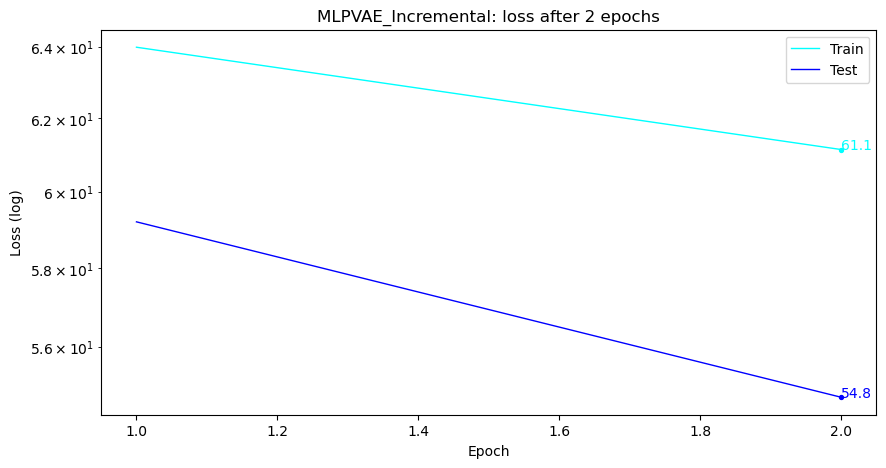

total=13 sec, epoch=2 (6.3 sec/epoch), train=61.14 (-4.45%), test=54.76 (-7.51%), overfit=0.90
total=19 sec, epoch=3 (6.3 sec/epoch), train=59.20 (-3.18%), test=54.50 (-0.49%), overfit=0.92


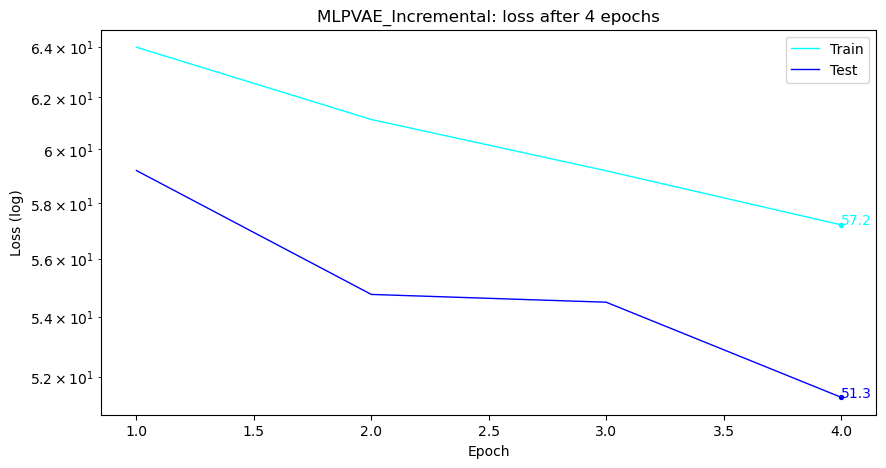

total=25 sec, epoch=4 (6.3 sec/epoch), train=57.22 (-3.35%), test=51.33 (-5.81%), overfit=0.90
total=31 sec, epoch=5 (6.3 sec/epoch), train=57.40 (0.32%), test=50.52 (-1.57%), overfit=0.88
*** Best! loss=55.89, without size penalty 54.88
MLPVAE_Incremental hidden=10, depth=4, ratio=0.2, latent=11, VAE depth=3, VAE ratio=3.79 (params=1,160,747, trainable=1,160,747 = 100.0%)
Adam batch=1, learning_rate=3.6e-06, weight_decay=0
hyper-parameters: [0, 3.5972832241227698e-06, 11, 3, 3.7891760873357825]


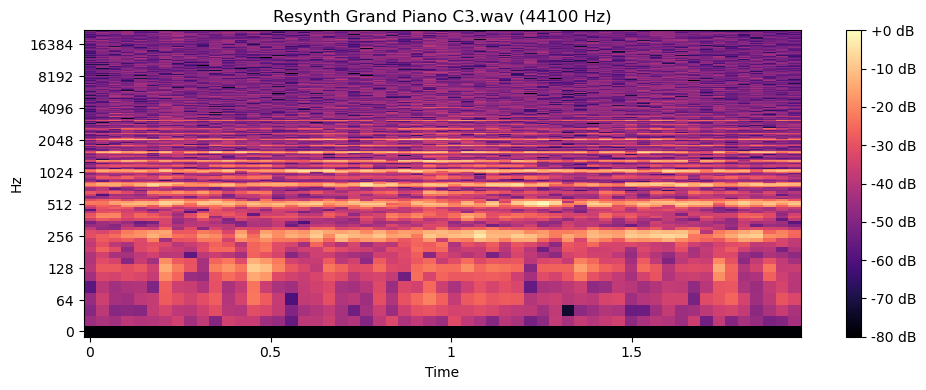

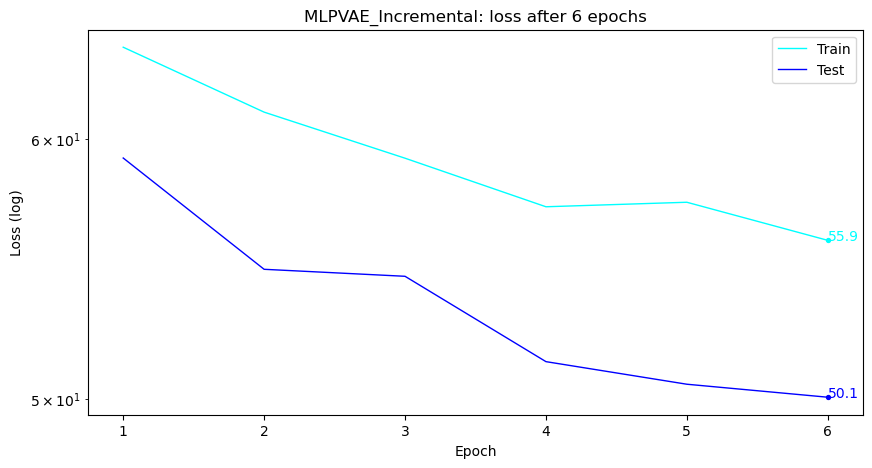

total=37 sec, epoch=6 (6.2 sec/epoch), train=55.89 (-2.64%), test=50.07 (-0.91%), overfit=0.90
total=44 sec, epoch=7 (6.3 sec/epoch), train=55.34 (-0.98%), test=50.24 (0.35%), overfit=0.91
total=50 sec, epoch=8 (6.3 sec/epoch), train=54.52 (-1.49%), test=49.42 (-1.63%), overfit=0.91


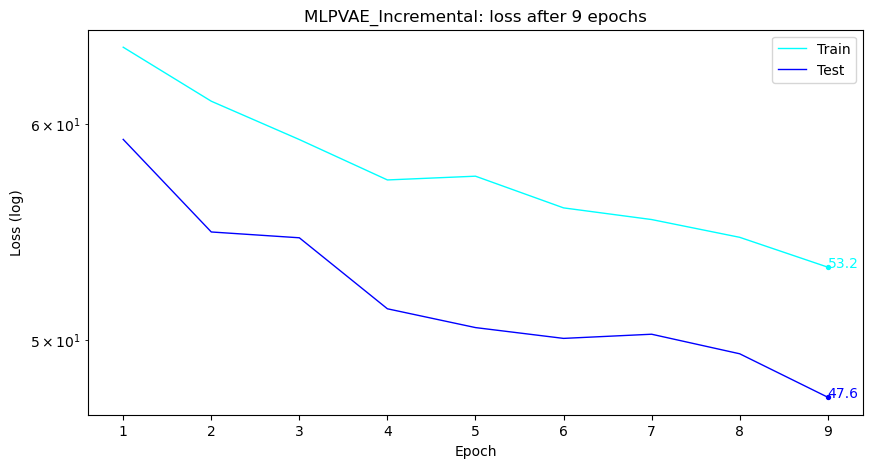

total=56 sec, epoch=9 (6.3 sec/epoch), train=53.16 (-2.48%), test=47.64 (-3.60%), overfit=0.90
*** Best! loss=52.48, without size penalty 51.47
MLPVAE_Incremental hidden=10, depth=4, ratio=0.2, latent=11, VAE depth=3, VAE ratio=3.79 (params=1,160,747, trainable=1,160,747 = 100.0%)
Adam batch=1, learning_rate=3.6e-06, weight_decay=0
hyper-parameters: [0, 3.5972832241227698e-06, 11, 3, 3.7891760873357825]


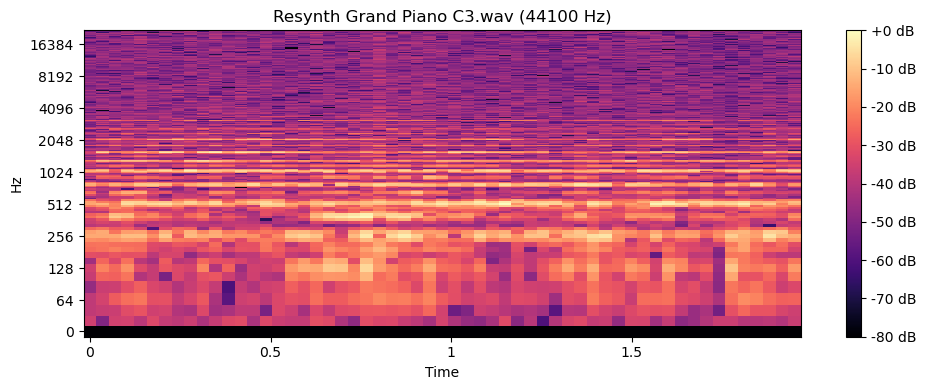

total=63 sec, epoch=10 (6.3 sec/epoch), train=52.48 (-1.29%), test=47.28 (-0.77%), overfit=0.90
total=69 sec, epoch=11 (6.3 sec/epoch), train=52.91 (0.82%), test=47.66 (0.81%), overfit=0.90
total=75 sec, epoch=12 (6.3 sec/epoch), train=52.61 (-0.56%), test=47.68 (0.04%), overfit=0.91


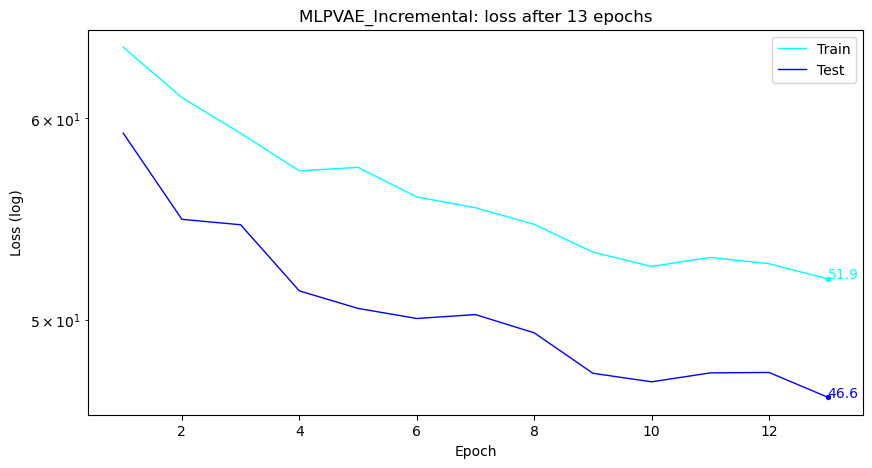

total=81 sec, epoch=13 (6.2 sec/epoch), train=51.89 (-1.36%), test=46.62 (-2.22%), overfit=0.90
total=87 sec, epoch=14 (6.2 sec/epoch), train=51.28 (-1.17%), test=47.42 (1.72%), overfit=0.92
total=93 sec, epoch=15 (6.2 sec/epoch), train=51.04 (-0.48%), test=45.42 (-4.24%), overfit=0.89
total=99 sec, epoch=16 (6.2 sec/epoch), train=51.16 (0.24%), test=45.22 (-0.42%), overfit=0.88
total=106 sec, epoch=17 (6.2 sec/epoch), train=50.76 (-0.79%), test=45.49 (0.60%), overfit=0.90
total=112 sec, epoch=18 (6.2 sec/epoch), train=50.48 (-0.54%), test=45.68 (0.42%), overfit=0.90


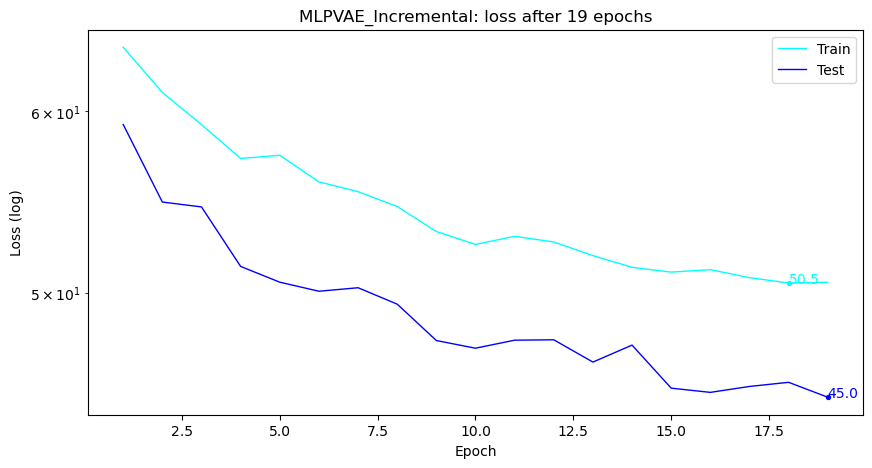

total=118 sec, epoch=19 (6.2 sec/epoch), train=50.52 (0.08%), test=45.00 (-1.49%), overfit=0.89
total=124 sec, epoch=20 (6.2 sec/epoch), train=50.04 (-0.95%), test=45.83 (1.83%), overfit=0.92


In [ ]:
# Find out the best hyper-parameters to train this model (typically needs to run overnight)
#model = "StepWiseMLP" # or "RNNAutoEncoder" and RNN_VAE_Incremental", or "StepWiseMLP" and "MLPVAE_Incremental"


#model = "RNNAutoEncoder"

#model = "MLP_VAE"
#model = "StepWiseMLP"
model = "MLPVAE_Incremental"

#model = "RNN_VAE"

#model = "STFT_VAE"

# First optimise the hyper-parameters for this model
#optimise_hyper_parameters(model)

# Then train using the best hyper-parameters
train_best_params(model)


# Alternatively, refine the training for the best set of hyper-parameters we've found


In [ ]:
# Test and Generate new samples
from Generate import *


# Test the accuracy of the model: lists all samples by decreasing accuracy
test_all()

# Print some pretty pictures of the samples and their encodings
demo_all()



